<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/notebook_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

En esta notebook, vamos a demostrar como funcionan los algoritmos vistos en clase y su implementación en Scikit-learn.

# Regresión Lineal

Vamos a empezar generando unos datos para mostrar unos ejemplos

# ¿Qué es load_iris?
**load_iris()** es una función que carga el famoso conjunto de datos Iris, que es uno de los datasets más comunes para experimentar con algoritmos de clasificación. Contiene información sobre flores de iris de tres especies distintas **(setosa, versicolor, virginica)** con características como:

Longitud del sépalo

Ancho del sépalo

Longitud del pétalo

Ancho del pétalo

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #load_iris es un dataset sobre 3 flores distintas

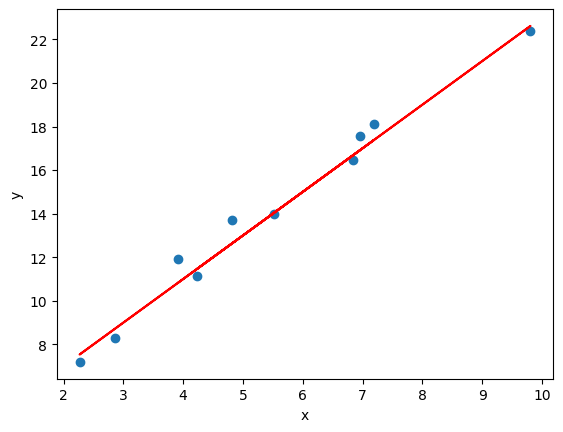

In [2]:
# Creamos datos que sigan una recta
np.random.seed(123)  #seed son las semillas que controla el inicio del generador de números aleatorios
a = 2 #pendiente
b = 3 #ordenada a la origen
x = np.random.rand(10)*10  #genera 10 números aleatorios multiplicado por 10 entonces se convierte en un array con 10 valores aleatorios de 0 a 10
y = a*x+b + np.random.randn(10)*0.5 #genera una recta y=a+x.b y además genera un ruido 0.5 aleatorio a cada punto de y, además np.ranndom.randn(10) general 10 valores con distribución normal
plt.scatter(x,y) #Crea un gráfico de dispersión con los puntos (x,y)
plt.plot(x, a*x+b, 'r') #Crea la recta original y 'r' es el color rojo
plt.xlabel('x'); #Añade la etiqueta x al eje X
plt.ylabel('y'); #Añade la etiqueta y al eje Y

In [3]:
x

array([6.96469186, 2.86139335, 2.26851454, 5.51314769, 7.1946897 ,
       4.2310646 , 9.80764198, 6.84829739, 4.80931901, 3.92117518])

In [4]:
x.reshape(-1,1) #la función reshape cambia la forma (dimensiones) de un array, -1 le dice a Numpy : "Calculá automáticamente cuántas filas hacen falta" y 1 significa una columna

array([[6.96469186],
       [2.86139335],
       [2.26851454],
       [5.51314769],
       [7.1946897 ],
       [4.2310646 ],
       [9.80764198],
       [6.84829739],
       [4.80931901],
       [3.92117518]])

La búsqueda de un modelo que describa el comportamiento de nuestros datos parte del supuesto de que existe una relación o función matemática subyacente que los relaciona. Nuestro trabajo es encontrar esa función.
Para eso vamos a usar la librería Scikit-Learn

In [5]:
from sklearn.linear_model import LinearRegression #LinearRegression para crear, entrenar y usar un modelo de regresión lineal

In [6]:
# Instanciamos el modelo
lr = LinearRegression() #lr es el modelo listo para entrenarse con los datos

In [7]:
# Le pedimos que encuentre los parámetros que mejor se ajustan a nuestros datos
lr.fit(x.reshape(-1,1), y) #este método ajusta el modelo de regresión lineal a los datos de entrenamiento #con fit lo entrenamos

LinearRegression()

Veamos qué encontró

In [8]:
# Imprimimos la pendiente
lr.coef_

array([2.02565598])

In [9]:
# Imprimimos la ordenada al origen
lr.intercept_

np.float64(3.0600038699795835)

Esto significa que la recta encontrada es $$y = 2.02565598 · x + 3.0600038699795835$$

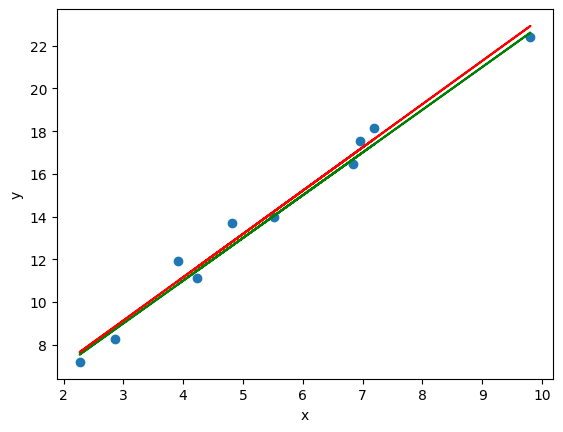

In [10]:
np.random.seed(123)
# y real
a = 2 #parámetros
b = 3 #parámetros
x = np.random.rand(10)*10 #generación de datos
y = a*x + b + np.random.randn(10)*0.5  #calcula los valores de y con ruido
y_real = a*x + b #calcula los valores reales sin ruido
# y predicha
a_p = lr.coef_ #extrae la pendiente
b_p = lr.intercept_ #extrae la intersección
y_predicted = a_p * x + b_p #Calcula los valores predichos por el modelo entrenado usando la ecuación ajustada
plt.scatter(x, y) #muestra los puntos de datos originales con ruido
plt.plot(x, y_real, 'green') #dibuja la recta real
plt.plot(x, y_predicted, 'r') #dibuja la recta predicha
plt.xlabel('x');
plt.ylabel('y');

# Regresión Logística

**Es un modelo de clasificación**

Vamos a entrenar un modelo para poder clasificar una observación en una categoría según sus características.



Armemos un dataset de juguete

In [15]:
from sklearn.datasets import make_classification #make_classification genera datasets sintéticos (falsos) para problemas de clasificación

In [16]:
X, y = make_classification(n_samples = 200, #n_samples número de muestras (filas)
                           n_features=2, #n_features número total de características (columnas)
                           n_informative= 2, #n_informative número de características útiles para la clasificación
                           n_redundant=0, #n_redundant características derivadas linealmente de de las informativas
                           n_clusters_per_class=2, #número de clases (por defecto 2)
                           flip_y = 0.15, #indica la proporción de etiquetas que se van a cambiar aleatoriamente, esto simula ruido realista, como errores de etiquetado o datos dificiles de clasificar
                           random_state=8) #semilla para obtener siempre los mismos datos

Veamos qué datos obtuvimos

In [17]:
X = pd.DataFrame(X, columns=['x1', 'x2']) #es un Dataframe con columnas llamadas x1 y x2
X.head()

,x1,x2
0,-1.189053,-0.648235
1,-1.368230,-0.072432
2,-1.876199,0.345642
3,0.018895,2.690086
4,-1.383127,1.197926


In [18]:
y = pd.Series(y, name='Clase') #estoy convirtiendo el array "y" en una Series de Pandas y dándole el nombre Clase
y.sample(10) #devuelve 10 elementos aleatorios de y

,Clase
163,1
157,1
61,1
197,1
91,0
73,1
85,0
81,1
111,1
114,0


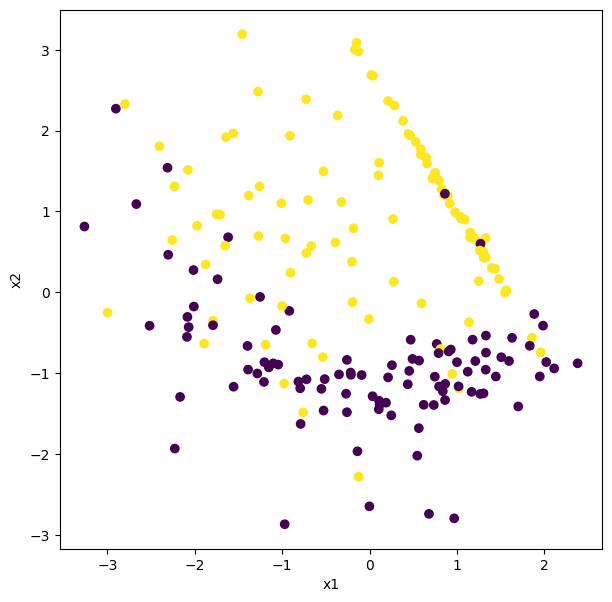

In [19]:
plt.figure(figsize=(7,7)) #crea una figura de tamaño de 7x7 pulgadas (cuadrada), define el lienzo donde se va a dibujar el gráfico
plt.scatter(X['x1'], X['x2'], c = y) #define los ejes x e y, y con "c=y" colorea los puntos según la clase (etiqueta) contenida en y (por ejemplo, 0 o 1, colores distintos)
plt.xlabel('x1') #etiqueta
plt.ylabel('x2')
xlim = plt.xlim() #obtiene lo límites actuales del eje x e y respectivamente, los guarda en las variables xlim y ylim
ylim = plt.ylim()

El objetivo ahora es poder clasificar las observaciones, es decir determinar el color del punto, en función de sus parámetros.

In [20]:
# Importamos la clase
from sklearn.linear_model import LogisticRegression

In [21]:
# Instanciamos el clasificador
lr = LogisticRegression(penalty=None, solver='saga') #penalty=None indica que no se aplicará regularización, la regularización se usa para evitar overfitting. Solver=saga especifica el algoritmo numérico que se usará para entrenar el modelo. "Saga" es un solver eficiente para datasets grandes y funciona con diferentes tipos de regularización. Se usa penalty=None para estudiar el modelo sin restricciones, como cuando estas aprendiendo.
#Overfitting (sobreajuste) ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido o los errores, y por eso falla al generalizar los nuevos datos

In [25]:
# Entrenamos el modelo
lr.fit(X,y) #significa que estoy entrenando (ajustando) el modelo de regresión logística lr con los datos de entrada X y sus etiquetas y.

LogisticRegression(penalty=None, solver='saga')

Veamos qué encontró.

In [26]:
lr.coef_ #coeficientes que encontró el modelo

array([[0.33258993, 1.9533593 ]])

In [27]:
lr.intercept_ #ordenada a la origen o el término o valor intercepto

array([0.26322011])

In [30]:
ejex = np.linspace(X['x1'].min(), X['x1'].max(), num=2) #crea dos puntos equiespaciados (inicio y fin) entre el mínimo y máximo valor de x1
#ejex va a ser un array de dos valores que se usará como eje X para graficar una línea recta
ejey = -(lr.coef_[0][0]*ejex + lr.intercept_)/lr.coef_[0][1] #calcula los valores de x2 correspondientes a la línea de frontera de decision

Grafiquemos el umbral de decisión.

(-3.171503680070779, 3.4958314570705675)

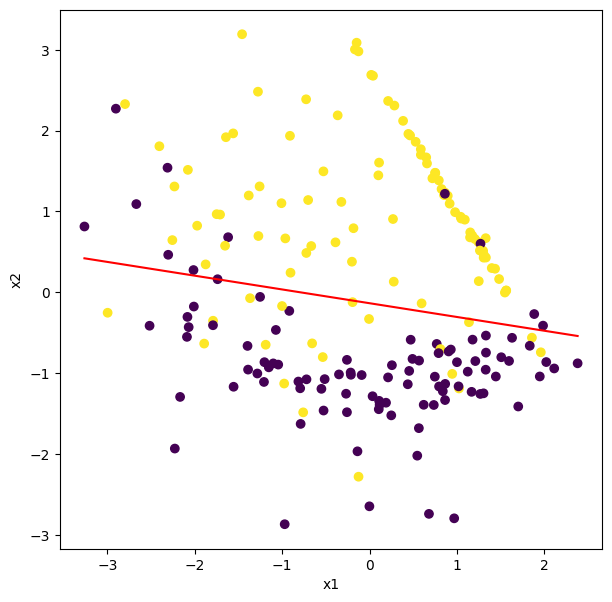

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(ejex, ejey, 'r')
plt.xlim(xlim)
plt.ylim(ylim)

In [32]:
y_pred = lr.predict(X) # “Usá el modelo lr entrenado para predecir las clases de los datos X, y guardá esas predicciones en y_pred.”

In [36]:
y.values #"Obtené los valores de la serie y como un array de NumPy."

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [35]:
y_pred #contiene las clases predichas por el modelo de regresión logística para cada observación de entrada X.

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1])

Complejizemos el modelo agregando nuevas features. En este caso agregaremos $x_2^2$

In [37]:
X['x2_cuadrado'] = X['x2']**2 #Agrego una nueva columna llamada x**2
X.head()

,x1,x2,x2_cuadrado
0,-1.189053,-0.648235,0.420209
1,-1.368230,-0.072432,0.005246
2,-1.876199,0.345642,0.119468
3,0.018895,2.690086,7.236562
4,-1.383127,1.197926,1.435027


Volvemos a entrenar el modelo

In [38]:
lr.fit(X,y)

LogisticRegression(penalty=None, solver='saga')

In [39]:
lr.coef_

array([[ 0.33544668,  1.99185887, -0.25168263]])

Veamos cómo cambió el umbral de decisión.

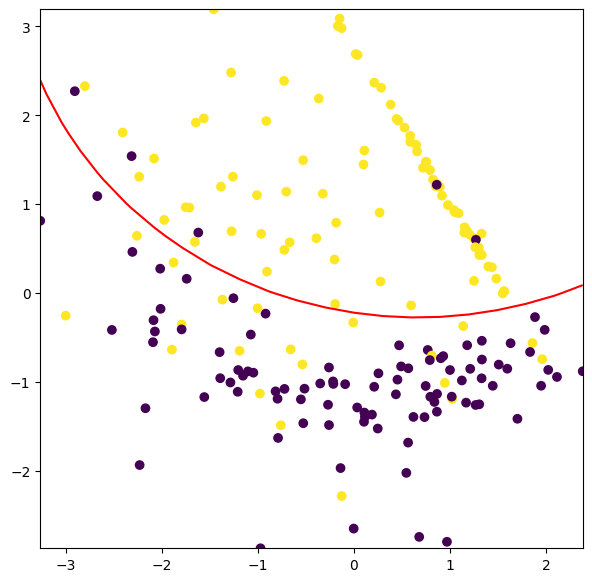

In [44]:
plt.figure(figsize=(7,7)) #tamaño del gráfico
x1 = np.linspace(X['x1'].min(), X['x1'].max(), 20) #np.linspace genera 20 valores equiespaciados entre el mínimo de x1 y x2
x2 = np.linspace(X['x2'].min(), X['x2'].max(), 20)
x1, x2 = np.meshgrid(x1,x2) #crea una malla 2D combinando cada valor de x1 con cada valor de x2
F = lr.coef_[0][0]*x1 + lr.coef_[0][1]*x2 + lr.coef_[0][2]*x1**2 + lr.coef_[0][2]*x2**2+ lr.intercept_ #calcula los valores de la función de decisión en cada punto de la malla.
plt.contour(x1,x2,F,[0],colors= 'r') #grafica la frontera de decisión del modelo, F=0, es decir, donde el modelo esta indeciso entre 0 y 1 (probabilidad = 0.5)
plt.scatter(X['x1'], X['x2'], c = y) #muestra los puntos originales del dataset, coloreados según su clase (y)